#### Task : 

     "You have to go to a page "https://en.wikipedia.org/wiki/Android_version_history" and then scrap the table content present there. Put the content in an organised way in a csv format. Read the csv file as a pandas dataframe and display the first 8 records of the data frame"

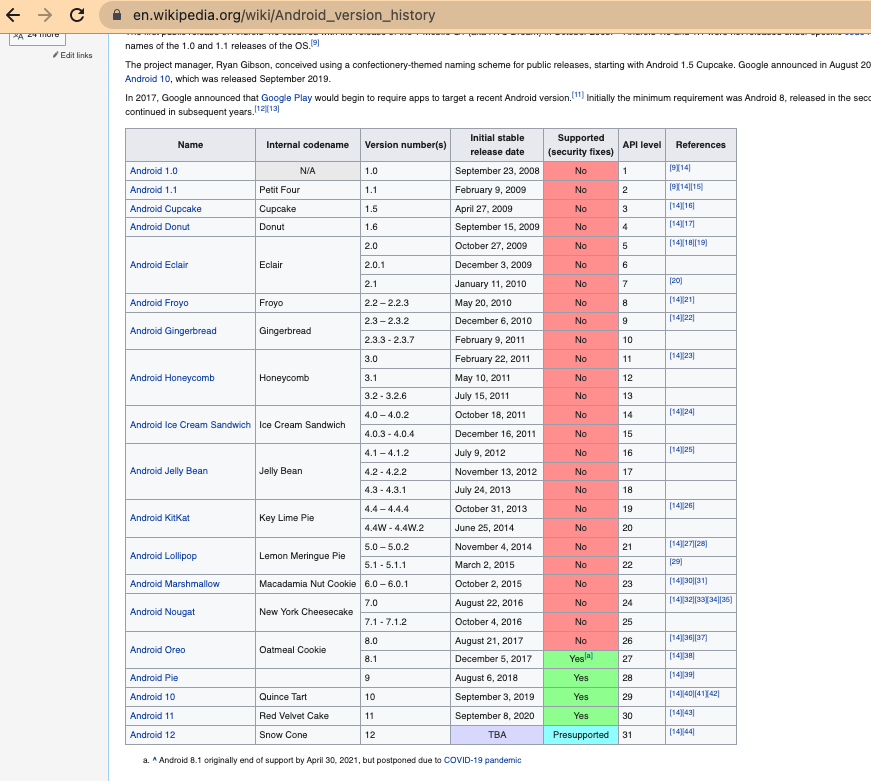

### STEP 1 : Getting the HTML page data 

    Lets get the HTML page first : 
        Approach 1 : use requests library 
        Approach 2 : use urllib.request.urlopen library 
        Approach 3 : download it manually as .html page and tehn read it 

In [3]:
base_url = "https://en.wikipedia.org/wiki/Android_version_history"

#### Approach 1

In [27]:
import requests

osVersionData = requests.get(base_url,'parser.html')

In [28]:
print(type(osVersionData))

<class 'requests.models.Response'>


So the data type is : "requests.models.Response". Lets try to  print it .

In [30]:
print(osVersionData)

<Response [200]>


Nothing right now to get the content we can use .text attribute of data type "requests.models.Response"

In [31]:
osVersionData = osVersionData.text

In [32]:
type(osVersionData)

str

So now its a string. So lets print it 

In [33]:
osVersionData

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Android version history - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"84697763-2235-43b5-9b42-d21a23d4bb3c","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Android_version_history","wgTitle":"Android version history","wgCurRevisionId":1038563212,"wgRevisionId":1038563212,"wgArticleId":30752816,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia indefinitely semi-protected pages","Articles with short description","Short description is different from Wikidata","Use

perfect right !!! Lets try the second approach.

#### Appraoch 2 

In [1]:
from urllib.request import urlopen

In [4]:
osVersionData = urlopen(base_url)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1124)>

This is a common issue with macOS users. To solve this: All you need to do is to install Python certificates! 

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Done, now we are good to start back .

In [6]:
osVersionData = urlopen(base_url)

In [7]:
print(type(osVersionData))

<class 'http.client.HTTPResponse'>


In [8]:
osVersionData

So basically this is an "HTTPResponse" so you can not read it directly.All you have to do is use .read() method on this object. 

In [9]:
osVersionData = osVersionData.read()

Now lets print it 

In [11]:
osVersionData

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Android version history - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c0955efc-72c0-40ff-8a84-e85c64051ea6","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Android_version_history","wgTitle":"Android version history","wgCurRevisionId":1038563212,"wgRevisionId":1038563212,"wgArticleId":30752816,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia indefinitely semi-protected pages","Articles with short description","Short description is different from Wikidata","Us

Now this is more like it. We have been habituated to see the page like this and lets now pull in our friend "Beautiful Soup"

#### Appraoch 3 : 

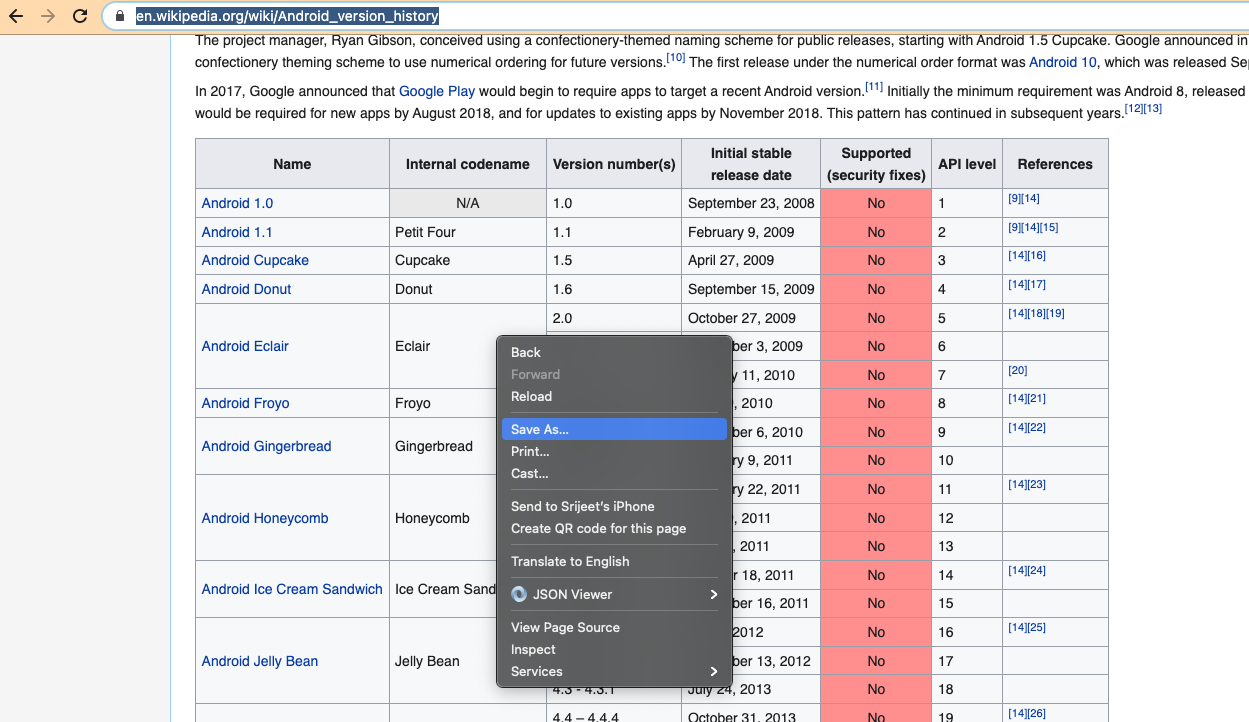

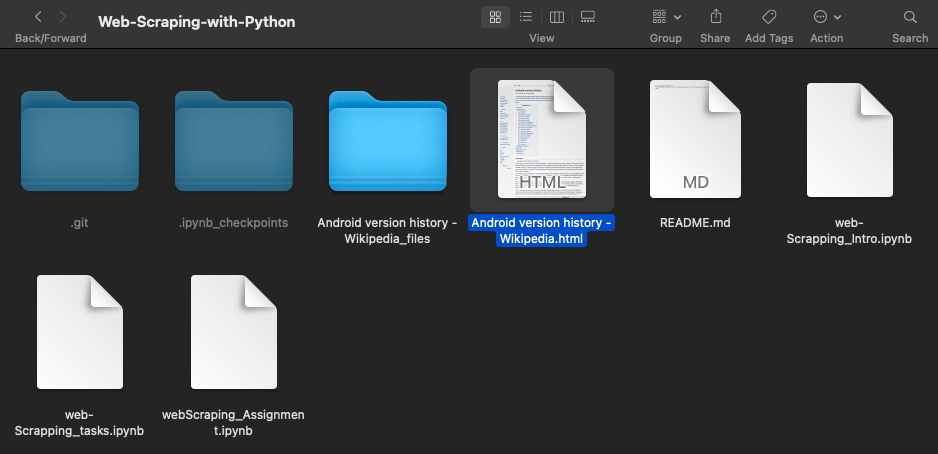

So basically we saved it locally. And we will use this as our html web page doc in step 2.

### Step 2 :  
                Investigate to understand which tag data you want from the page 

    We will see few screenshots below and we will be able to conclude that : 
    
        1. All the table contents are under <table> tag with class as 'wikitable'.
        2. the table header names are placed under <th> tag.
        3. For rest of the rows that contents are under <td> tag.

The solution Apppraoch is : 
   1. We will fetch all teh rows using       soupObject.findALL('tr')
   2. Then we will get the row names using   soupObject.findALL('th')
   3. And then the other row condents using the looping of table row elements from 2nd row onwards and then get the content for each element of that row.

lets see a demo. 

In [13]:
from bs4 import BeautifulSoup

In [31]:
soupObj  = BeautifulSoup(osVersionData,'lxml')

In [32]:
type(soupObj)

bs4.BeautifulSoup

In [33]:
soupObj

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Android version history - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c0955efc-72c0-40ff-8a84-e85c64051ea6","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Android_version_history","wgTitle":"Android version history","wgCurRevisionId":1038563212,"wgRevisionId":1038563212,"wgArticleId":30752816,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia indefinitely semi-protected pages","Articles with short description","Short description is different from Wikidata","Use mdy d

 Perfect !!! Lets now select all the <tr> element

In [35]:
tableRows = soupObj.find_all('table',{'class':'wikitable'})

In [36]:
len(tableRows)

32

But we have to deal with just the first table .

In [37]:
firstTable = tableRows[0]

In [38]:
type(firstTable)

bs4.element.Tag

In [39]:
firstTable

<table class="wikitable">
<tbody><tr>
<th>Name
</th>
<th>Internal codename
</th>
<th>Version number(s)
</th>
<th>Initial stable<br/>release date
</th>
<th>Supported<br/>(security fixes)
</th>
<th>API level
</th>
<th>References
</th></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Android_1.0" title="Android 1.0">Android 1.0</a>
</td>
<td class="table-na" data-sort-value="" style="background: #ececec; color: #2C2C2C; vertical-align: middle; text-align: center;">N/A
</td>
<td>1.0
</td>
<td>September 23, 2008
</td>
<td class="table-no" style="background:#F99;vertical-align:middle;text-align:center;">No
</td>
<td>1
</td>
<td><sup class="reference" id="cite_ref-unofficial_and_official_codenames_9-1"><a href="#cite_note-unofficial_and_official_codenames-9">[9]</a></sup><sup class="reference" id="cite_ref-:0_14-0"><a href="#cite_note-:0-14">[14]</a></sup>
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Android_1.1" title="Android 1.1">Android 1.1</a>
</td>
<td>Petit Four
</td>
<td>1.1

In [40]:
len(firstTable)

2

In [ ]:
Lets now get the useful data from this table 

In [42]:
features = firstTable.find_all('th',{})

In [43]:
len(features)

7

And we know that we had 7 columns only. So seems good. Lets just print it. 

In [44]:
features

[<th>Name
 </th>,
 <th>Internal codename
 </th>,
 <th>Version number(s)
 </th>,
 <th>Initial stable<br/>release date
 </th>,
 <th>Supported<br/>(security fixes)
 </th>,
 <th>API level
 </th>,
 <th>References
 </th>]

In [ ]:
We would like to get the contents in a list of featurenames.

In [45]:
features = [x.text for x in features]

In [46]:
features

['Name\n',
 'Internal codename\n',
 'Version number(s)\n',
 'Initial stablerelease date\n',
 'Supported(security fixes)\n',
 'API level\n',
 'References\n']

In [ ]:
Now these is a backslashat teh end of each name. We can remove by using the slicing or may be stripping()

In [52]:
newfeatures = [x.strip('\n') for x in features]
newfeatures

['Name',
 'Internal codename',
 'Version number(s)',
 'Initial stablerelease date',
 'Supported(security fixes)',
 'API level',
 'References']

In [51]:
features = [x[:-1] for x in features]
features

['Name',
 'Internal codename',
 'Version number(s)',
 'Initial stablerelease date',
 'Supported(security fixes)',
 'API level',
 'References']

    So now the feature names are properly extracted. Now what we will do is : 
        >> loop through the rest of the elements and get the data row wise 
        >> And we will start looping from 2nd row as 1st row is already used to get the feature names extracted.

In [53]:
rowData = firstTable.find_all('tr',{})

In [54]:
len(rowData)

32

In [55]:
type(rowData)

bs4.element.ResultSet

In [57]:
table_data = []
for ele in rowData[1:]:
    row_data = []
    
    celldata = ele.find_all('td',{})
    for data in celldata:
        row_data.append(data.getText())
        
    table_data.append(row_data)

In [58]:
table_data

[['Android 1.0\n',
  'N/A\n',
  '1.0\n',
  'September 23, 2008\n',
  'No\n',
  '1\n',
  '[9][14]\n'],
 ['Android 1.1\n',
  'Petit Four\n',
  '1.1\n',
  'February 9, 2009\n',
  'No\n',
  '2\n',
  '[9][14][15]\n'],
 ['Android Cupcake\n',
  'Cupcake\n',
  '1.5\n',
  'April 27, 2009\n',
  'No\n',
  '3\n',
  '[14][16]\n'],
 ['Android Donut\n',
  'Donut\n',
  '1.6\n',
  'September 15, 2009\n',
  'No\n',
  '4\n',
  '[14][17]\n'],
 ['Android Eclair\n',
  'Eclair\n',
  '2.0\n',
  'October 27, 2009\n',
  'No\n',
  '5\n',
  '[14][18][19]\n'],
 ['2.0.1\n', 'December 3, 2009\n', 'No\n', '6\n', '\n'],
 ['2.1\n', 'January 11, 2010\n', 'No\n', '7\n', '[20]\n'],
 ['Android Froyo\n',
  'Froyo\n',
  '2.2 – 2.2.3\n',
  'May 20, 2010\n',
  'No\n',
  '8\n',
  '[14][21]\n'],
 ['Android Gingerbread\n',
  'Gingerbread\n',
  '2.3 – 2.3.2\n',
  'December 6, 2010\n',
  'No\n',
  '9\n',
  '[14][22]\n'],
 ['2.3.3 - 2.3.7\n', 'February 9, 2011\n', 'No\n', '10\n', '\n'],
 ['Android Honeycomb\n',
  'Honeycomb\n',
  '3

In [ ]:
As you can see a lot of cleaning is required.Every cell has a \n so strip it. 

In [59]:
table_data = []
for ele in rowData[1:]:
    row_data = []
    
    celldata = ele.find_all('td',{})
    for data in celldata:
        row_data.append(data.getText().strip('\n'))
        
    table_data.append(row_data)

In [60]:
table_data

[['Android 1.0', 'N/A', '1.0', 'September 23, 2008', 'No', '1', '[9][14]'],
 ['Android 1.1',
  'Petit Four',
  '1.1',
  'February 9, 2009',
  'No',
  '2',
  '[9][14][15]'],
 ['Android Cupcake',
  'Cupcake',
  '1.5',
  'April 27, 2009',
  'No',
  '3',
  '[14][16]'],
 ['Android Donut',
  'Donut',
  '1.6',
  'September 15, 2009',
  'No',
  '4',
  '[14][17]'],
 ['Android Eclair',
  'Eclair',
  '2.0',
  'October 27, 2009',
  'No',
  '5',
  '[14][18][19]'],
 ['2.0.1', 'December 3, 2009', 'No', '6', ''],
 ['2.1', 'January 11, 2010', 'No', '7', '[20]'],
 ['Android Froyo',
  'Froyo',
  '2.2 – 2.2.3',
  'May 20, 2010',
  'No',
  '8',
  '[14][21]'],
 ['Android Gingerbread',
  'Gingerbread',
  '2.3 – 2.3.2',
  'December 6, 2010',
  'No',
  '9',
  '[14][22]'],
 ['2.3.3 - 2.3.7', 'February 9, 2011', 'No', '10', ''],
 ['Android Honeycomb',
  'Honeycomb',
  '3.0',
  'February 22, 2011',
  'No',
  '11',
  '[14][23]'],
 ['3.1', 'May 10, 2011', 'No', '12', ''],
 ['3.2 - 3.2.6', 'July 15, 2011', 'No', '13

In [ ]:
So now as you must be observing that not each element has same size. And the reason is that table rows are being merged. In teh original page table.

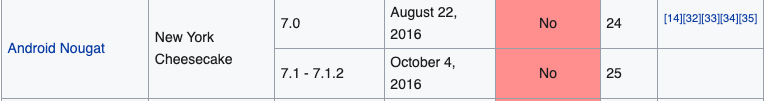

In [ ]:
In scenarios like this first entry has length 7 and the second has length 5. So lets handle this :
    
     >> Whenever we have 

In [61]:
table_data = []

for ele in rowData[1:]:
    row_data = []
    
    celldata = ele.find_all('td',{})
    
    if len(celldata) == 5:
        row_data.append(table_data[-1][0])
        row_data.append(table_data[-1][1])
    
    for data in celldata:
        row_data.append(data.getText().strip('\n'))
    
    table_data.append(row_data)

In [69]:
table_data

[['Android 1.0', 'N/A', '1.0', 'September 23, 2008', 'No', '1', '[9][14]'],
 ['Android 1.1',
  'Petit Four',
  '1.1',
  'February 9, 2009',
  'No',
  '2',
  '[9][14][15]'],
 ['Android Cupcake',
  'Cupcake',
  '1.5',
  'April 27, 2009',
  'No',
  '3',
  '[14][16]'],
 ['Android Donut',
  'Donut',
  '1.6',
  'September 15, 2009',
  'No',
  '4',
  '[14][17]'],
 ['Android Eclair',
  'Eclair',
  '2.0',
  'October 27, 2009',
  'No',
  '5',
  '[14][18][19]'],
 ['Android Eclair', 'Eclair', '2.0.1', 'December 3, 2009', 'No', '6', ''],
 ['Android Eclair', 'Eclair', '2.1', 'January 11, 2010', 'No', '7', '[20]'],
 ['Android Froyo',
  'Froyo',
  '2.2 – 2.2.3',
  'May 20, 2010',
  'No',
  '8',
  '[14][21]'],
 ['Android Gingerbread',
  'Gingerbread',
  '2.3 – 2.3.2',
  'December 6, 2010',
  'No',
  '9',
  '[14][22]'],
 ['Android Gingerbread',
  'Gingerbread',
  '2.3.3 - 2.3.7',
  'February 9, 2011',
  'No',
  '10',
  ''],
 ['Android Honeycomb',
  'Honeycomb',
  '3.0',
  'February 22, 2011',
  'No',
  

In [ ]:
so now we have a list of lists and we have features.

In [74]:
with open('mydata.csv','w') as f:
    featureString = ','.join(features)
    
    f.write(featureString)
    
    for data in table_data:
        rowString = ','.join(data)
        f.write(rowString)
        break

Now the challenge is they are not forming new lines as enter to csv ...

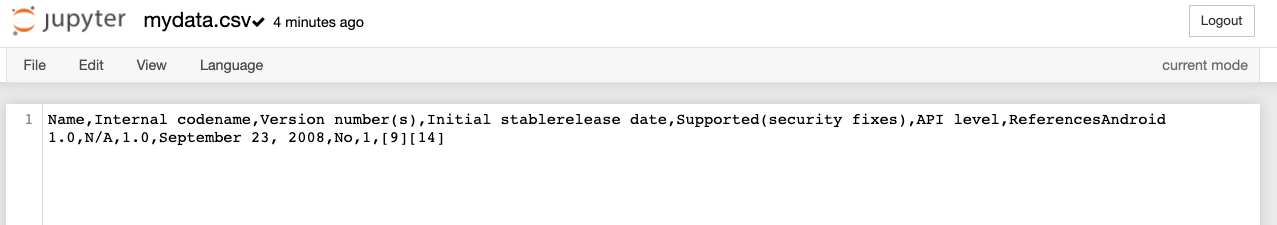

In [83]:
with open('mydata.csv','w') as f:
    featureString = ','.join(features)
    featureString = featureString + '\n'
    f.write(featureString)
    for data in table_data:
        rowString = ','.join(data)
        rowString = rowString + '\n'
        f.write(rowString)

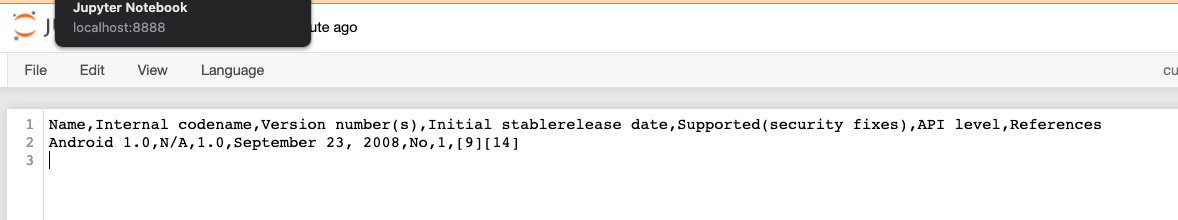

In [84]:
with open('mydata.csv','r') as f:
    print(f.readlines())

['Name,Internal codename,Version number(s),Initial stablerelease date,Supported(security fixes),API level,References\n', 'Android 1.0,N/A,1.0,September 23, 2008,No,1,[9][14]\n', 'Android 1.1,Petit Four,1.1,February 9, 2009,No,2,[9][14][15]\n', 'Android Cupcake,Cupcake,1.5,April 27, 2009,No,3,[14][16]\n', 'Android Donut,Donut,1.6,September 15, 2009,No,4,[14][17]\n', 'Android Eclair,Eclair,2.0,October 27, 2009,No,5,[14][18][19]\n', 'Android Eclair,Eclair,2.0.1,December 3, 2009,No,6,\n', 'Android Eclair,Eclair,2.1,January 11, 2010,No,7,[20]\n', 'Android Froyo,Froyo,2.2 – 2.2.3,May 20, 2010,No,8,[14][21]\n', 'Android Gingerbread,Gingerbread,2.3 – 2.3.2,December 6, 2010,No,9,[14][22]\n', 'Android Gingerbread,Gingerbread,2.3.3 - 2.3.7,February 9, 2011,No,10,\n', 'Android Honeycomb,Honeycomb,3.0,February 22, 2011,No,11,[14][23]\n', 'Android Honeycomb,Honeycomb,3.1,May 10, 2011,No,12,\n', 'Android Honeycomb,Honeycomb,3.2 - 3.2.6,July 15, 2011,No,13,\n', 'Android Ice Cream Sandwich,Ice Cream Sa

In [85]:
import pandas as pd

df = pd.read_csv('mydata.csv')

In [86]:
df.head()

,Name,Internal codename,Version number(s),Initial stablerelease date,Supported(security fixes),API level,References
Android 1.0,NaN,1.0,September 23,2008,No,1,[9][14]
Android 1.1,Petit Four,1.1,February 9,2009,No,2,[9][14][15]
Android Cupcake,Cupcake,1.5,April 27,2009,No,3,[14][16]
Android Donut,Donut,1.6,September 15,2009,No,4,[14][17]
Android Eclair,Eclair,2.0,October 27,2009,No,5,[14][18][19]


In [89]:
df['Name']

Android 1.0                                    NaN
Android 1.1                             Petit Four
Android Cupcake                            Cupcake
Android Donut                                Donut
Android Eclair                              Eclair
Android Eclair                              Eclair
Android Eclair                              Eclair
Android Froyo                                Froyo
Android Gingerbread                    Gingerbread
Android Gingerbread                    Gingerbread
Android Honeycomb                        Honeycomb
Android Honeycomb                        Honeycomb
Android Honeycomb                        Honeycomb
Android Ice Cream Sandwich      Ice Cream Sandwich
Android Ice Cream Sandwich      Ice Cream Sandwich
Android Jelly Bean                      Jelly Bean
Android Jelly Bean                      Jelly Bean
Android Jelly Bean                      Jelly Bean
Android KitKat                        Key Lime Pie
Android KitKat                 

So you got the problem ???  It has made the name as the index .... The root cause is because we have "," as part of teh date.And csv is considering it as seprate values.So lets just take care of it while adding it into the csv.

In [92]:
with open('mydata.csv','w') as f:
    featureString = ','.join(features)
    featureString = featureString + '\n'
    
    f.write(featureString)
    
    for data in table_data:
        rowString = ','.join([x.replace(',','') for x in data])
        rowString = rowString + '\n'
        f.write(rowString)

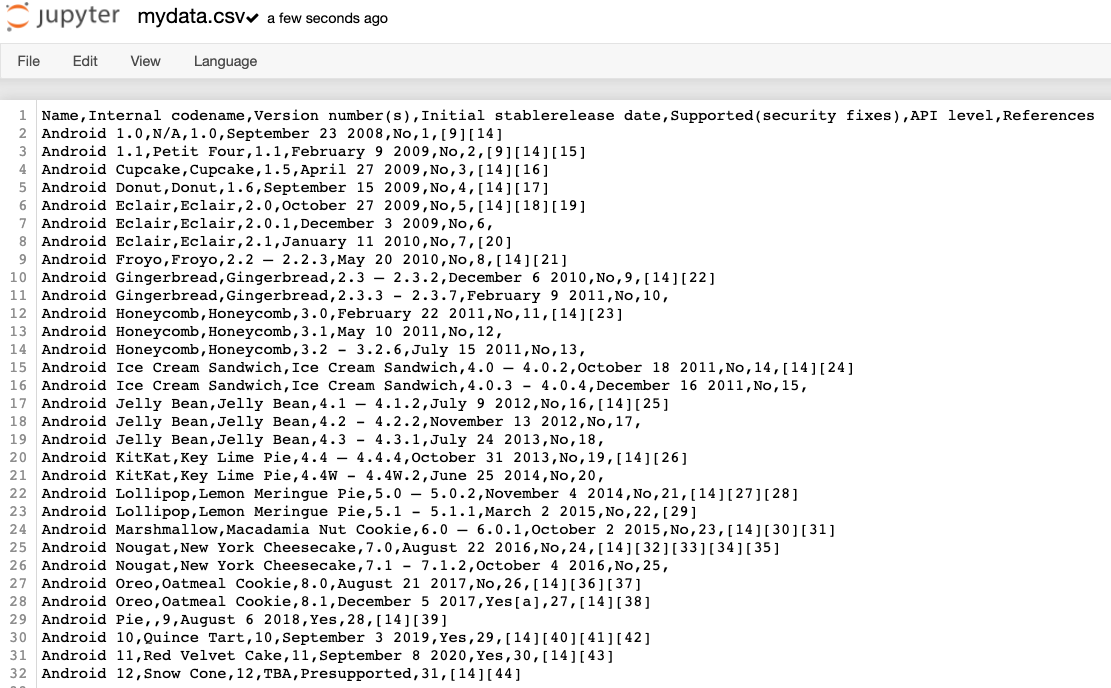

In [ ]:
Looks fine now ... so lets just load it as dataframe.

In [93]:
import pandas as pd

df = pd.read_csv('mydata.csv')

In [96]:
df

,Name,Internal codename,Version number(s),Initial stablerelease date,Supported(security fixes),API level,References
0,Android 1.0,NaN,1.0,September 23 2008,No,1,[9][14]
1,Android 1.1,Petit Four,1.1,February 9 2009,No,2,[9][14][15]
2,Android Cupcake,Cupcake,1.5,April 27 2009,No,3,[14][16]
3,Android Donut,Donut,1.6,September 15 2009,No,4,[14][17]
4,Android Eclair,Eclair,2.0,October 27 2009,No,5,[14][18][19]
5,Android Eclair,Eclair,2.0.1,December 3 2009,No,6,NaN
6,Android Eclair,Eclair,2.1,January 11 2010,No,7,[20]
7,Android Froyo,Froyo,2.2 – 2.2.3,May 20 2010,No,8,[14][21]
8,Android Gingerbread,Gingerbread,2.3 – 2.3.2,December 6 2010,No,9,[14][22]
9,Android Gingerbread,Gingerbread,2.3.3 - 2.3.7,February 9 2011,No,10,NaN


In [ ]:
Perfect right !!!

### Step 3 : 
             1. putting the HTML data to get a beautiful soup object.
             2. Use soup functions to get the data.